In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
os.environ["KAGGLE_USERNAME"]="rohanpro"
os.environ["KAGGLE_KEY"]="219e0ec80ecd55f2338cc2a02bfe0e6a"



In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

covid-face-mask-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

In [ ]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,"Train")
test_dir = os.path.join(main_dir,"Test")
valid_dir = os.path.join(main_dir,"Validation")

train_mask_dir =os.path.join(train_dir,"Mask")
train_nomask_dir =os.path.join(train_dir,"Non Mask")



In [ ]:
train_mask_names = os.listdir(train_mask_dir)
train_nomask_names = os.listdir(train_nomask_dir)

['/content/New Masks Dataset/Train/Mask/0891.jpg', '/content/New Masks Dataset/Train/Mask/1635.jpg', '/content/New Masks Dataset/Train/Mask/1346.jpg', '/content/New Masks Dataset/Train/Mask/1577.jpg', '/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/0954.jpg', '/content/New Masks Dataset/Train/Mask/0205.jpg', '/content/New Masks Dataset/Train/Mask/1159.jpg', '/content/New Masks Dataset/Train/Non Mask/329.jpg', '/content/New Masks Dataset/Train/Non Mask/110.jpg', '/content/New Masks Dataset/Train/Non Mask/171.jpg', '/content/New Masks Dataset/Train/Non Mask/47.jpg', '/content/New Masks Dataset/Train/Non Mask/91.jpg', '/content/New Masks Dataset/Train/Non Mask/256.jpg', '/content/New Masks Dataset/Train/Non Mask/123.jpg', '/content/New Masks Dataset/Train/Non Mask/155.jpg'] 
 []


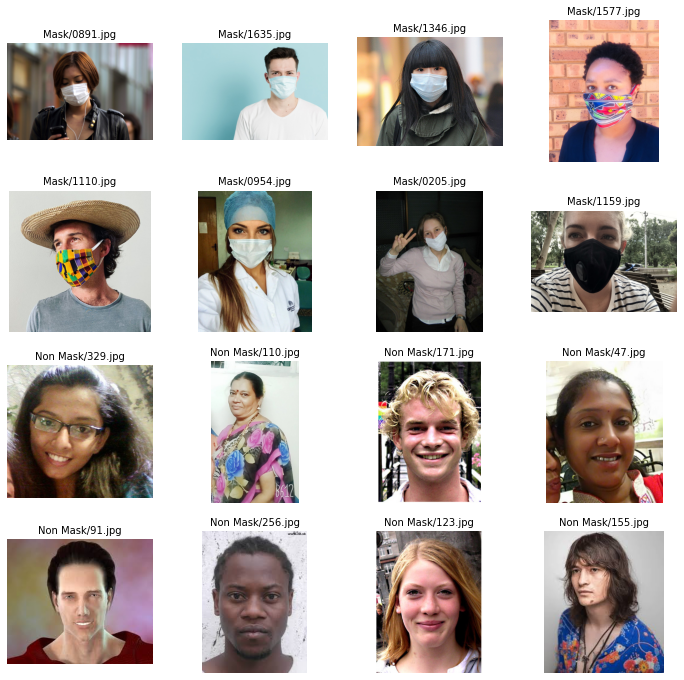

In [ ]:
import matplotlib.image as mpimg
nrows =4
ncols=4
plt.figure(figsize=(12,12))

mask_pic =[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic =[]
for i in train_nomask_names[0:8]:
  mask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic,"\n",nomask_pic)

merged_list = mask_pic+nomask_pic
for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

19/19 [==============================] - 14s 732ms/step - loss: 0.6167 - accuracy: 0.6983 - val_loss: 0.6653 - val_accuracy: 0.7549
Epoch 3/30
19/19 [==============================] - 14s 738ms/step - loss: 0.4260 - accuracy: 0.8283 - val_loss: 0.5053 - val_accuracy: 0.8072
Epoch 4/30
19/19 [==============================] - 14s 741ms/step - loss: 0.3629 - accuracy: 0.8750 - val_loss: 0.5039 - val_accuracy: 0.7941
Epoch 5/30
19/19 [==============================] - 14s 745ms/step - loss: 0.3523 - accuracy: 0.8683 - val_loss: 0.3957 - val_accuracy: 0.8627
Epoch 6/30
19/19 [==============================] - 14s 755ms/step - loss: 0.3051 - accuracy: 0.8883 - val_loss: 0.3693 - val_accuracy: 0.8791
Epoch 7/30
19/19 [==============================] - 14s 745ms/step - loss: 0.2545 - accuracy: 0.9117 - val_loss: 0.3269 - val_accuracy: 0.8725
Epoch 8/30
19/19 [==============================] - 14s 749ms/step - loss: 0.2437 - accuracy: 0.9233 - val_loss: 0.2689 - val_accuracy: 0.9052
Epoch 9/30

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

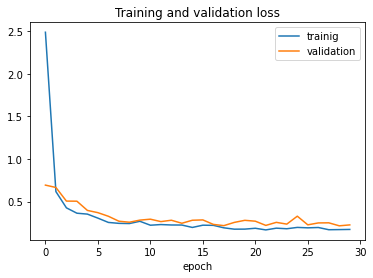

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

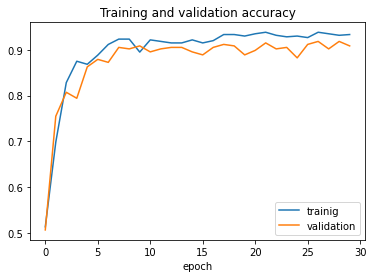

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 1s 297ms/step - loss: 0.1944 - accuracy: 0.9100
test acc :0.9100000262260437 test loss:0.194401815533638


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving download.jpg to download.jpg
download.jpg
mask


In [ ]:
model.save('model.h5')